# Project 1 - Fuel Efficiency Analysis and Model

## Part 1

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [106]:
cars = pd.read_csv('project1.csv')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [107]:
print('The shape of the dataset is', cars.shape)

The shape of the dataset is (398, 9)


In [108]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


From this information, we can see that `horsepower` has type `object`. From the first 5 rows displayed above, we know that the type for `horsepower` should be `int`, which means that we need to dive deeper to see if there are any null entries.

In [109]:
cars['horsepower'] = pd.to_numeric(cars['horsepower'], errors='coerce')
print(cars.isnull().sum())
print('Mean of horsepower before deletion:', cars['horsepower'].mean())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64
Mean of horsepower before deletion: 104.46938775510205


This tells us that there are 6 null entries in `horsepower`. To preserve the numeric mean of the other 392 `horsepower` values, I will replace the null values with the numeric mean. While this may not be accurate to the model of the car, it helps to not skew the mean.

In [110]:
cars['horsepower'].fillna(cars['horsepower'].mean(), inplace=True)
print(cars.isnull().sum())
print('Mean of horsepower after deletion:', cars['horsepower'].mean())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64
Mean of horsepower after deletion: 104.46938775510203


/tmp/ipykernel_34/3425711397.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['horsepower'].fillna(cars['horsepower'].mean(), inplace=True)


We can see that the 6 null values for `horsepower` have been removed, but the mean of the `horsepower` values remain the same.

In [111]:
print('Unique values for mpg:', len(cars['mpg'].unique()))
print('Unique values for cylinders:', len(cars['cylinders'].unique()))
print('Unique values for displacement:', len(cars['displacement'].unique()))
print('Unique values for horsepower:', len(cars['horsepower'].unique()))
print('Unique values for weight:', len(cars['weight'].unique()))
print('Unique values for acceleration:', len(cars['acceleration'].unique()))
print('Unique values for model_year:', len(cars['model_year'].unique()))
print('Unique values for origin:', len(cars['origin'].unique()))
print('Unique values for car_name:', len(cars['car_name'].unique()))

Unique values for mpg: 129
Unique values for cylinders: 5
Unique values for displacement: 82
Unique values for horsepower: 94
Unique values for weight: 351
Unique values for acceleration: 95
Unique values for model_year: 13
Unique values for origin: 3
Unique values for car_name: 305


Because `car_name` has a high number of unique values and no numerical data type, it should be removed as there are likely no patterns that are identifiable.

In [112]:
cars.drop('car_name', axis=1, inplace=True)

In [113]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


When inspecting the data, there appears to be an outlier at a value of 230 under `horsepower`.

When looking at the unique values from above, `origin` only has 3 unique values. I will perform one-hot encoding on this variable.

In [114]:
cars['origin'].unique()

array([1, 3, 2])

In [115]:
cars['origin'] = cars['origin'].astype('category')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    398 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model_year    398 non-null    int64   
 7   origin        398 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 22.4 KB


In [116]:
cars = pd.get_dummies(cars, columns=['origin'], drop_first=True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin_2      398 non-null    bool   
 8   origin_3      398 non-null    bool   
dtypes: bool(2), float64(4), int64(3)
memory usage: 22.7 KB


The first variable that is analyzed is mpg, specifically its distribution, to see if the data is symmetric or skewed. It appears the mode is around 20 mpg with a slight right skew.

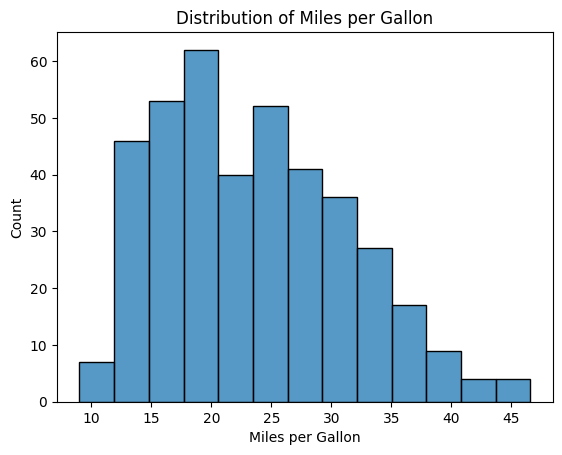

In [117]:
sns.histplot(data=cars, x='mpg')
plt.title('Distribution of Miles per Gallon')
plt.xlabel('Miles per Gallon')
plt.ylabel('Count')
plt.show()

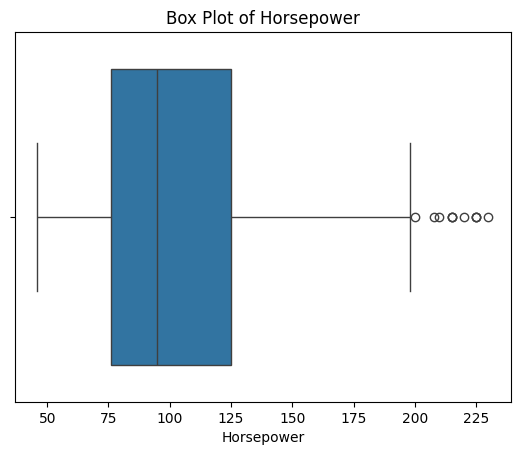

In [118]:
sns.boxplot(x=cars['horsepower'])
plt.title('Box Plot of Horsepower')
plt.xlabel('Horsepower')
plt.show()

As shown in this plot, there are outliers from 200 to 230 horsepower, as predicted.

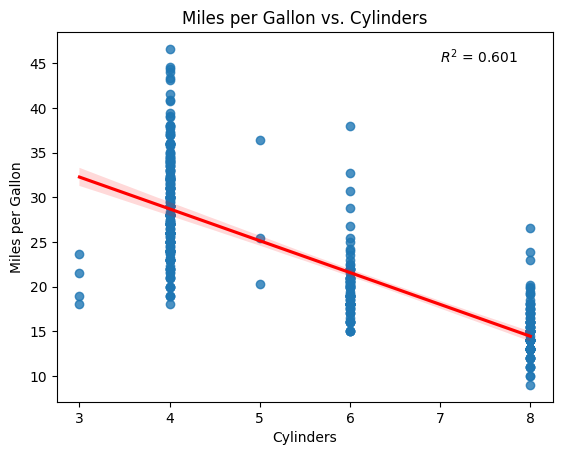

In [119]:
x = cars['cylinders']
y = cars['mpg']

m, b, r, p, err = stats.linregress(x, y)

sns.regplot(x='cylinders', y='mpg', data=cars, line_kws={'color': 'red'})
plt.title('Miles per Gallon vs. Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Miles per Gallon')
plt.annotate(f'$R^2$ = {r**2:.3f}', xy=(7, 45))
plt.show()

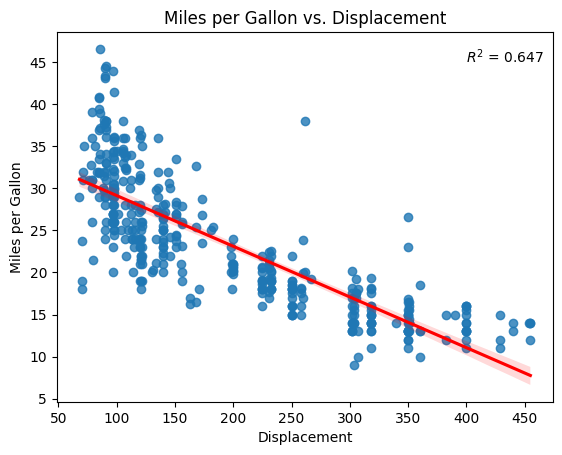

In [120]:
x = cars['displacement']
y = cars['mpg']

m, b, r, p, err = stats.linregress(x, y)

sns.regplot(x='displacement', y='mpg', data=cars, line_kws={'color': 'red'})
plt.title('Miles per Gallon vs. Displacement')
plt.xlabel('Displacement')
plt.ylabel('Miles per Gallon')
plt.annotate(f'$R^2$ = {r**2:.3f}', xy=(400, 45))
plt.show()

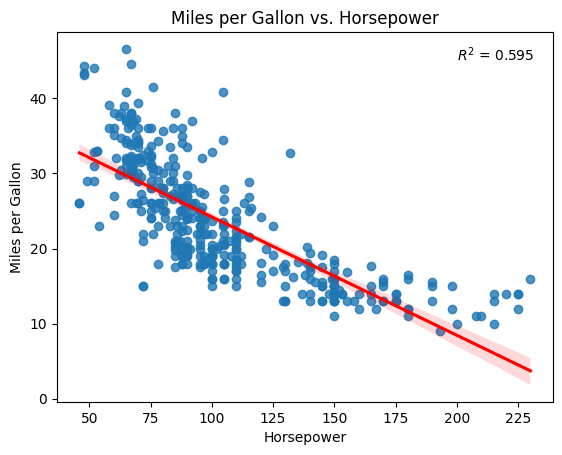

In [121]:
x = cars['horsepower']
y = cars['mpg']

m, b, r, p, err = stats.linregress(x, y)

sns.regplot(x='horsepower', y='mpg', data=cars, line_kws={'color': 'red'})
plt.title('Miles per Gallon vs. Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon')
plt.annotate(f'$R^2$ = {r**2:.3f}', xy=(200, 45))
plt.show()

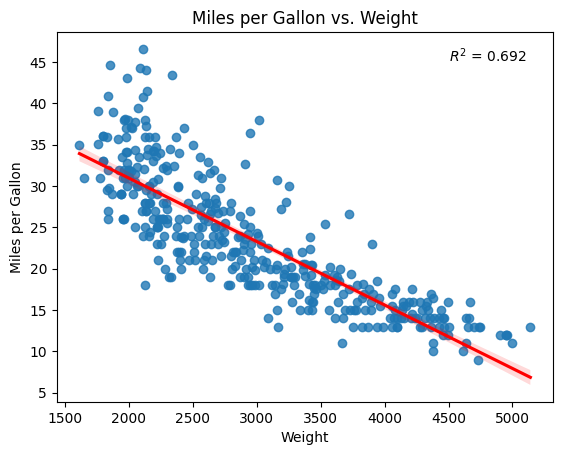

In [122]:
x = cars['weight']
y = cars['mpg']

m, b, r, p, err = stats.linregress(x, y)

sns.regplot(x='weight', y='mpg', data=cars, line_kws={'color': 'red'})
plt.title('Miles per Gallon vs. Weight')
plt.xlabel('Weight')
plt.ylabel('Miles per Gallon')
plt.annotate(f'$R^2$ = {r**2:.3f}', xy=(4500, 45))
plt.show()

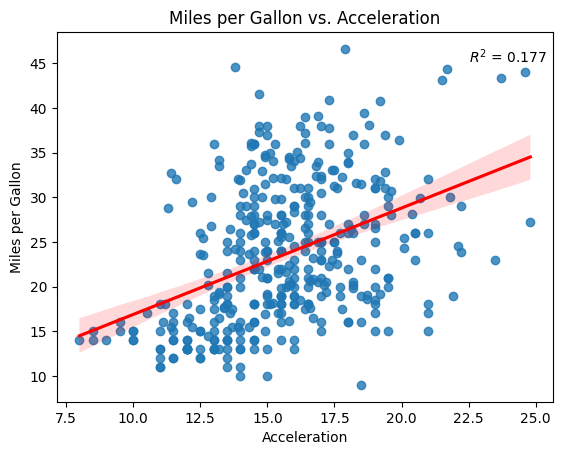

In [123]:
x = cars['acceleration']
y = cars['mpg']

m, b, r, p, err = stats.linregress(x, y)

sns.regplot(x='acceleration', y='mpg', data=cars, line_kws={'color': 'red'})
plt.title('Miles per Gallon vs. Acceleration')
plt.xlabel('Acceleration')
plt.ylabel('Miles per Gallon')
plt.annotate(f'$R^2$ = {r**2:.3f}', xy=(22.5, 45))
plt.show()

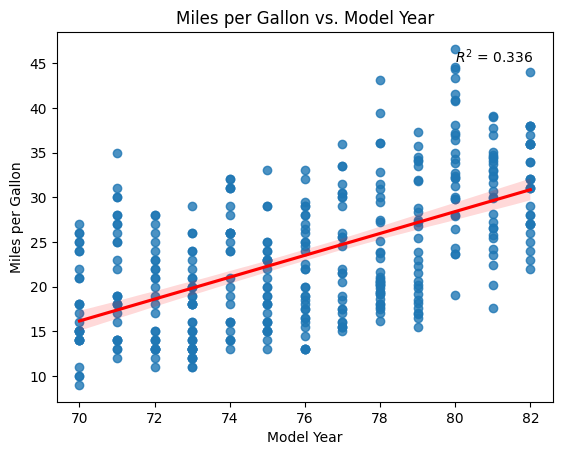

In [124]:
x = cars['model_year']
y = cars['mpg']

m, b, r, p, err = stats.linregress(x, y)

sns.regplot(x='model_year', y='mpg', data=cars, line_kws={'color': 'red'})
plt.title('Miles per Gallon vs. Model Year')
plt.xlabel('Model Year')
plt.ylabel('Miles per Gallon')
plt.annotate(f'$R^2$ = {r**2:.3f}', xy=(80, 45))
plt.show()

From the regression plots, we are able to identify which variables have a strong correlation on fuel efficiency. The number of cylinders, the displacement, the horsepower, and the weight, when plotted against miles per gallon, all show indirect relationships and $R^2$ values of around 0.60, showing strong correlation.

I decided to ignore cylinders because the range of values was not large. There could be some false trends when a dataset's values are not spread over a wide range.

Engines with a high displacement require more fuel to move throughout it, thus not being as fuel efficient as smaller engines with less displacement, per ChatGPT.

Cars with a higher horsepower usually require more fuel to drive, and therefore are not considered to be fuel efficient.

The weight of a car is directly proportional to its fuel consumption, as heavier cars, such as SUVs and trucks, need more fuel and power to move. Thus, they are not as fuel efficient as lighter cars.

## Part 2

In [125]:
import sklearn

X = cars.drop('mpg', axis=1)
y = cars['mpg']

The data is split into training and test sets:

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

A linear regression model is fit on the data:

In [127]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Since there are 8 features in this linear regression model, it is not able to be plotted on a 2-D or 3-D graph. Instead, an equation is shown to represent a predictive model using features and their respective weights.

In [128]:
equation = 'mpg = '
for coef, name in zip(lr.coef_, lr.feature_names_in_):
    equation += f'{coef:.3f}*{name} + '

equation += str(lr.intercept_)
print(equation)

mpg = -0.396*cylinders + 0.029*displacement + -0.021*horsepower + -0.007*weight + 0.066*acceleration + 0.838*model_year + 2.991*origin_2 + 2.378*origin_3 + -21.379795484727342


In [129]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, lr.predict(X_train))
r2_test = r2_score(y_test, lr.predict(X_test))

print('Training R^2 score:', r2_train)
print('Test R^2 score:', r2_test)

Training R^2 score: 0.8140809771344937
Test R^2 score: 0.8431594053433745


As mentioned previously, the linear regression model cannot be shown visually, but rather through an equation due to the multi-featured nature of the data. The $R^2$ value of the test set is higher than that of the training set, which is interesting as the model was made to fit the training data. The model may be a bit overfit for the training data, yielding some inaccurate results, while accurately predicting the values of the new test data that it has not seen before.